In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

__Задание 1.__ 

Решить краевую задачу:

$$
\begin{aligned}
&y^{\prime \prime}+(1-4 x) y^{\prime}+8 y=5, \quad 0<x<1 \\
&y^{\prime}(0)-y(0)=0 ; \quad y(1)=0
\end{aligned}
$$ 

### Метод линейной интерполяции*

Рассмотрим смешанную краевую задачу для уравнения

 $$
 y^{\prime \prime}+p(x) y^{\prime}+q(x) y+f(x)=0, \quad 0<x<l 
 $$

Граничные условия возьмем в смешанном виде

$$
\begin{gathered}
y(0)=a, \\
y^{\prime}(l)+\alpha y(l)=b .
\end{gathered}
$$  

Выберем любые два значения $\lambda=\lambda_{1}, \;\lambda=\lambda_{2}$ и решим две задачи Коши с начальными условиями:

$$
\begin{aligned}
&y_{1}(0)=a, \quad  y_{1}^{\prime}(0)=\lambda_{1} \\
&y_{2}(0)=a, \quad  y_{2}^{\prime}(0)=\lambda_{2}
\end{aligned}
$$

Полученные решения обозначим как $y=y_{1}(x)$ и $y=y_{2}(x)$. Найдем соответствующие значения левых частей в граничном условии.  

\begin{aligned}
&y_{1}^{\prime}(l)+\alpha y_{1}(l)=b_{1} \\
&y_{2}^{\prime}(l)+\alpha y_{2}(l)=b_{2}
\end{aligned}

Теперь значение недостающего начального условия $y^{\prime}(0)=\lambda$ можно найти с помощью линейной интерполяции:

$$
\frac{\lambda-\lambda_{1}}{\lambda_{2}-\lambda_{1}}=\frac{b-b_{1}}{b_{2}-b_{1}} \quad \text {, T.e. } \lambda=\lambda_{1}+\left(\lambda_{2}-\lambda_{1}\right) \frac{b-b_{1}}{b_{2}-b_{1}} .
$$

Полученное значение $\lambda$ и будет являться недостающим начальным условием. Объясняется это линейностью задачи. Как известно, дифференциальное уравнение имеет общее решение

$$
y(x)=c_{1} u_{1}(x)+c_{2} u_{2}(x)+y_{n}(x),
$$

где $u_{1}(x)$ и $u_{2}(x)$ - линейно-независимые решения однородного уравнения (при $f(x) \equiv 0)$, а $y_{n}(x)$ - какое-либо решение неоднородного уравнения (частное решение неоднородного уравнения). Удовлетворяя левому граничному условию, в общем решении останется одна неизвестная постоянная, которая входит в выражение для $y(x)$ линейным образом. Проведя в плоскости $(\lambda, b)$ прямую, проходящую через две точки $\left(\lambda_{1}, b_{1}\right)$ и $\left(\lambda_{2}, b_{2}\right)$ при заданном значении $b$ мы однозначно найдем точное значение $\lambda$.  

Теперь таблицу значений функции $y(x)$ (и ее производной) можно найти интерполяцией $y(x)=y_{1}(x)+\left[y_{1}(x)-y_{1}(x)\right] \cdot \frac{\lambda-\lambda_{1}}{\lambda_{2}-\lambda_{1}}$.

Однако на практике, жертвуя машинным временем, обычно проводят третий расчет задачи Коши с условиями
$$
y(0)=a, \quad y^{\prime}(0)=\lambda .
$$

__Замечание.__

 На практике обычно выбирают простейшие значения $\lambda$, например $\lambda_{1}=1$ и $\lambda_{2}=0$. При этом, если само уравнение является однородным, т.е. $f(x) \equiv 0$, и граничное условие так же однородное, $y(0)=0$, то решение имеет вид $y_{2}(x) \equiv 0, b_{2}=0$. Тогда второй расчет (при $\lambda_{2}=0$ ) нет необходимости производить и формула даст ответ в виде

$$
\lambda=\lambda_{1} \frac{b}{b_{1}} .
$$

Поэтому, если предложено решить однородное уравнение, то следует посмотреть, есть ли однородное граничное условие и если оно есть, то начинать расчет следует от этой границы! Эта рекомендация остается в силе и для других методов решения краевых задач.

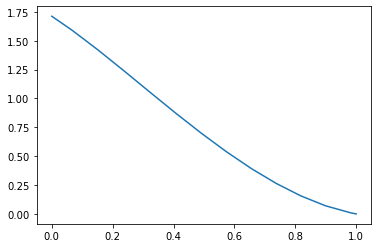

In [41]:
def f(t, y):
    return y[1],  5 - 8 * y[0] - y[1] * (1 - 4 * t) 

y1 = solve_ivp(f, (0, 1), [0, 0], rtol=1e-10)
y2 = solve_ivp(f, (0, 1), [0, 1], rtol=1e-10)

b1 = y1.y[1][y1.y[1].shape[0] - 1] - y1.y[0][y1.y[0].shape[0] - 1]
b2 = y2.y[1][y2.y[1].shape[0] - 1] - y2.y[0][y2.y[0].shape[0] - 1]
lmb = -b1 / (b2 - b1)
result = solve_ivp(f, (0, 1), [0, lmb], rtol=1e-10)

plt.plot(1 - result.t, result.y[0])

__Задание 2.__ 

Рассмотрим решение следущей граничной задачи

$$
\begin{gathered}
d^{2} y / d x^{2}=-y+x \cos x \\
\\
d y(0) / d x=3 y(0)+2, \quad d y(\pi / 2) / d x=-5 y(\pi / 2)+2 .
\end{gathered}
$$

Известно точное решение этой задачи

$$
y=-0.73 \cos x-0.441 \sin x+(1 / 4)\left(x^{2} \sin x+x \cos x\right),
$$

откуда

$$
y(\pi / 2)=0.175 \text { и } d y(\pi / 2) / d x=1.122 .
$$

Найдите эти граничные значения, решая задачу методом дифференциальной прогонки. 

### Метод дифференциальной прогонки

Имеем уравнение из примера:

$$
\begin{aligned}
& y^{\prime \prime}+q(x) y^{\prime}-p(x) y=f(x), \quad 0<x \leq 1 \\
& y(0)=Y_0, \quad y(1)=Y_1
\end{aligned}
$$

Перепишем это уравнение в виде следующей системы (естественно, это можно сделать не единственным способом)

$$
\left\{\begin{aligned}
& \frac{d y}{d x}=a(x) v+b(x) \\
& \frac{d v}{d x}=c(x) y+g(x)
\end{aligned} \right .
$$

И будем искать решение в виде т.н. __прогоночного соотношения__:

$$
y(x)=\alpha(x) v(x)+\beta(x)
$$

где $\alpha(x)$ и $\beta(x)$ - пока неизвестные функции (__прогоночные коэффициенты__), для которых необходимо получить дифференциальные уравнения.

Тогда, решение можно найти, решив следующие 3 задачи Коши в соответствующем порядке:

$$
\begin{aligned}
& \alpha^{\prime}(x)+c \cdot \alpha^2(x)-a=0, \quad \alpha(0)=0 \\ \\
& \beta^{\prime}(x)+\alpha \cdot \beta (x) \cdot c+\alpha \cdot g-b=0, \quad \beta(0)=Y_0\\ \\
& v^{\prime}(x)=\alpha \cdot c \cdot v(x)+c \cdot \beta+g, \quad v(1)=\cfrac{Y_1 - \beta(1)}{\alpha(1)}
\end{aligned}
$$

Метод очень хорош для нежестких задач.

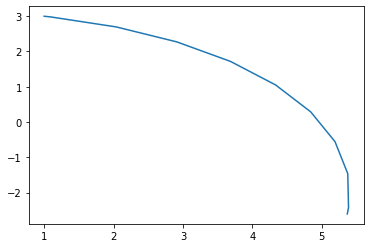

In [77]:
def f(t, y):
    return y[1]+2, t * np.cos(t) - y[0]
result = solve_ivp(f, (0, np.pi / 2), [1, 3], rtol=1e-10)


plt.plot(result.y[0], result.y[1])

__Задание 3.__ 

Напишите программу, которая решает нелинейное уравнение Пуассона:

$$
\phi^{\prime \prime}(x)=e^{\phi(x)}-n(x), \quad \text { где } n(x)=1+e^{-3(x-5)^{2}}  
$$

в области $0<=x<=10$ с граничными условиями $\phi(0)=\phi(10)=0 .$


### Метод стрельбы 

Хотим решить __краевую задачу__

$$
\begin{aligned}
& y^{\prime \prime}=f\left(x, y, y^{\prime}\right), \quad 0<x \leq 1, \\
& y(0)=Y_0, \quad y(1)=Y_1
\end{aligned}
$$

Пусть умеем решать __задачу Коши__ для произвольного __пристрелочного параметра__ $\alpha$:

$$
\begin{aligned}
& y^{\prime \prime}=f\left(x, y, y^{\prime}\right), \quad 0<x \leq 1, \\
& y(0)=Y_0, \quad y^{\prime}(0)=\alpha
\end{aligned}
$$

Обозначим решение этой задачи Коши как $y_\alpha(x)$

Наша цель - __найти__ такой $\alpha = \alpha^*$, что полученное решение удовлетворяет изначальным краевым условиям. Иначе, хотим найти ноль следующей функции:

$$
F(\alpha)=y_\alpha(1)-Y_1
$$

$$
F(\alpha^*)=0
$$

Это можно делать с помощью любого алгоритма поиска нуля численно заданной функции (см. решение нелинейных уравнений), например, дихотомией или итерацией по Ньютону:

$$
\alpha_{n+1}=\alpha_n-\frac{F\left(\alpha_n\right)}{F^{\prime}\left(\alpha_n\right)}
$$

$$
F^{\prime}\left(\alpha_n\right)\approx\frac{F\left(\alpha_n+h\right)-F\left(\alpha_n\right)}{h}
$$

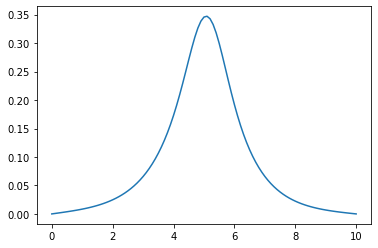

In [47]:
from scipy.optimize import newton
def euler_Poisson_solver(s, l, h):
    n_steps = int(l / h)
    xs = np.arange(n_steps+1)*h
    u = np.empty(n_steps+1)
    v = np.empty(n_steps+1)
    U = np.empty(n_steps+1)
    V = np.empty(n_steps+1)
    u[0] =0
    v[0] = s
    U[0] = 0
    V[0] = 1
    for i in range(n_steps):
        u[i+1] = u[i] + v[i] * h
        v[i+1] = v[i] + h * (np.e**u[i] - (1 + np.e**(-3 * (i * h - 5)**2)))
        U[i+1] = U[i] + h * V[i]
        V[i+1] = V[i] + h * U[i] * np.e**u[i]
    return xs, u, v, U, V
def func(s):
    l = 10
    h = 0.1
    return euler_Poisson_solver(s, l, h)[1][int(l / h)]
def func_prime(s):
    l = 10
    h = 0.1
    return euler_Poisson_solver(s, l, h)[3][int(l / h)]
s0 = newton(func, 0.007, fprime=func_prime, tol=1e-10, full_output=True)
xs, u, v, U, V = euler_Poisson_solver(s0[0], 10, 0.1)
plt.plot(xs, u)
plt.show()

In [49]:
import numpy as np
def pend(y, x, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

In [50]:
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)

In [51]:
from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b, c))

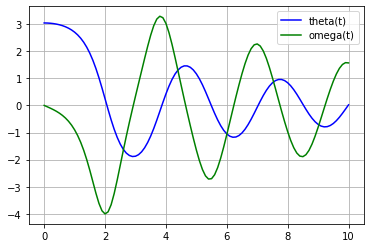

In [52]:
import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend()
plt.grid()
plt.show()